In [66]:
from carbon.helpers.stdimports import *
from carbon import ConstantProductCurve as CPC, CPCContainer, CarbonOrderUI
import carbon.tokenscale as ts
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPC))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonOrderUI))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ts.TokenScaleBase))
print_version(require="2.4.2")

ConstantProductCurve v2.3 (8/Apr/2023)
CarbonOrderUI v1.9.2 (30/Mar/2023)
TokenScaleBase v1.0 (07/Apr/2022)
Carbon v2.4.2-BETA0 (31/Mar/2023)


# Constant product curve [NBTest063]

## Assertions and testing

In [67]:
c = CPC.from_px(p=2000,x=10, pair="ETH/USDC")
assert c.pair == "ETH/USDC"
assert c.tknb == c.pair.split("/")[0]
assert c.tknx == c.tknb
assert c.tknq == c.pair.split("/")[1]
assert c.tkny == c.tknq
assert f"{c.tknb}/{c.tknq}" == c.pair
print (c.descr)

None


In [68]:
c = CPC.from_xy(10,20)
assert c == CPC.from_kx(c.k, c.x)
assert c == CPC.from_ky(c.k, c.y)
assert c == CPC.from_xy(c.x, c.y)
assert c == CPC.from_pk(c.p, c.k)
assert c == CPC.from_px(c.p, c.x)
assert c == CPC.from_py(c.p, c.y)

In [69]:
c = CPC.from_px(p=2, x=100, x_act=10, y_act=20)
assert c.y_max*c.x_min == c.k
assert c.x_max*c.y_min == c.k
assert c.p_min == c.y_min / c.x_max
assert c.p_max == c.y_max / c.x_min
assert c.p_max >= c.p_min

In [70]:
c = CPC.from_px(p=2, x=100, x_act=10, y_act=20)
e = 1e-5
assert 95*c.yfromx_f(x=95) == c.k
assert 105*c.yfromx_f(x=105) == c.k
assert 190*c.xfromy_f(y=190) == c.k
assert 210*c.xfromy_f(y=210) == c.k
assert not c.yfromx_f(x=90) is None
assert c.yfromx_f(x=90-e) is None
assert not c.xfromy_f(y=180) is None
assert c.xfromy_f(y=180-e) is None
assert c.dyfromdx_f(dx=-5)
assert (c.y+c.dyfromdx_f(dx=-5))*(c.x-5) == c.k
assert (c.y+c.dyfromdx_f(dx=+5))*(c.x+5) == c.k
assert (c.x+c.dxfromdy_f(dy=-5))*(c.y-5) == c.k
assert (c.x+c.dxfromdy_f(dy=+5))*(c.y+5) == c.k

In [71]:
c = CPC.from_pkpp(p=100, k=100)
assert c.p_min == 100
assert c.p_max == 100
assert c.p == 100
assert c.k == 100

In [72]:
c = CPC.from_pkpp(p=100, k=100, p_min=80, p_max=120)
assert c.p_min == 80
assert iseq(c.p_max, 120)
assert c.p == 100
assert c.k == 100

## iseq

In [73]:
assert iseq("a", "a", "ab") == False
assert iseq("a", "a", "a")
assert iseq(1.0, 1, 1.0)
assert iseq(0,0)
assert iseq(0,1e-10)
assert iseq(0,1e-5) == False
assert iseq(1, 1.00001) == False
assert iseq(1, 1.000001)
assert iseq(1, 1.000001, eps=1e-7) == False
assert iseq("1", 1) == False

## CarbonOrderUI integration

In [74]:
o = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2500, 3000, 10, 10)
c = o.as_cpc
assert o.pair.slashpair == "ETH/USDC"
assert o.tkn == "ETH"
assert o.p_start == 2500
assert o.p_end == 3000
assert o.p_marg == 2500
assert o.y == 10
assert o.yint == 10
assert c.pair == o.pair.slashpair
assert c.tknb == o.pair.tknb
assert c.tknq == o.pair.tknq
assert c.x_act == o.y
assert c.y_act == 0
assert iseq(o.p_start, c.p, c.p_min)
assert iseq(o.p_end, c.p_max)

In [75]:
o = CarbonOrderUI.from_prices("ETH/USDC", "USDC", 1500, 1000, 1000, 1000)
c = o.as_cpc
assert o.pair.slashpair == "ETH/USDC"
assert o.tkn == "USDC"
assert o.p_start == 1500
assert o.p_end == 1000
assert o.p_marg == 1500
assert o.y == 1000
assert o.yint == 1000
assert c.pair == o.pair.slashpair
assert c.tknb == o.pair.tknb
assert c.tknq == o.pair.tknq
assert c.x_act == 0
assert c.y_act == o.y
assert iseq(o.p_start, c.p, c.p_max)
assert iseq(o.p_end, c.p_min)

In [76]:
o = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2500, 3000, 10, 7)
c = o.as_cpc
assert o.y == 7
assert iseq(c.x_act, o.y)
assert iseq(c.y_act, 0)
assert iseq(o.p_marg, c.p, c.p_min)
assert iseq(o.p_end, c.p_max)

In [77]:
o = CarbonOrderUI.from_prices("ETH/USDC", "USDC", 1500, 1000, 1000, 700)
c = o.as_cpc
assert o.y == 700
assert iseq(c.x_act, 0)
assert iseq(c.y_act, o.y)
assert iseq(o.p_marg, c.p, c.p_max)
assert iseq(o.p_end, c.p_min)

## New CPC features in v2

In [78]:
p = CPCContainer.Pair("ETH/USDC")
assert str(p) == "ETH/USDC"
assert p.pair == str(p)
assert p.tknx == "ETH"
assert p.tkny == "USDC"
assert p.tknb == "ETH"
assert p.tknq == "USDC"

pp = CPCContainer.Pair.wrap(["ETH/USDC", "WBTC/ETH"])
assert len(pp) == 2
assert pp[0].pair == "ETH/USDC"
assert pp[1].pair == "WBTC/ETH"
assert pp[0].unwrap(pp) == ('ETH/USDC', 'WBTC/ETH')

In [79]:
pairs = ["A", "B", "C"]
assert CPCContainer.pairset(", ".join(pairs)) == set(pairs)
assert CPCContainer.pairset(pairs) == set(pairs)
assert CPCContainer.pairset(tuple(pairs)) == set(pairs)
assert CPCContainer.pairset(p for p in pairs) == set(pairs)

In [80]:
pairs = [f"{a}/{b}" for a in ["ETH", "USDC", "DAI"] for b in ["DAI", "WBTC", "LINK", "ETH"] if a!=b]
CC = CPCContainer()
fp = lambda **cond: CC.filter_pairs(pairs=pairs, **cond)
assert fp(bothin="ETH, USDC, DAI") == {'DAI/ETH', 'ETH/DAI', 'USDC/DAI', 'USDC/ETH'}
assert fp(onein="WBTC") == {'DAI/WBTC', 'ETH/WBTC', 'USDC/WBTC'}
assert fp(onein="ETH") == fp(contains="ETH")
assert fp(notin="WBTC, ETH, DAI") == {'USDC/LINK'}
assert fp(tknbin="WBTC") == set()
assert fp(tknqin="WBTC") == {'DAI/WBTC', 'ETH/WBTC', 'USDC/WBTC'}
assert fp(tknbnotin="WBTC") == set(pairs)
assert fp(tknbnotin="WBTC, ETH, DAI") == {'USDC/DAI', 'USDC/ETH', 'USDC/LINK', 'USDC/WBTC'}
assert fp(notin_0="WBTC", notin_1="DAI") == fp(notin="WBTC, DAI")
assert fp(onein = "ETH") == fp(anyall=CC.FP_ANY, tknbin="ETH", tknqin="ETH")

In [81]:
P = CPCContainer.Pair
ETHUSDC = P("ETH/USDC")
USDCETH = P(ETHUSDC.pairr)
assert ETHUSDC.pair == "ETH/USDC"
assert ETHUSDC.pairr == "USDC/ETH"
assert USDCETH.pairr == "ETH/USDC"
assert USDCETH.pair == "USDC/ETH"
assert ETHUSDC.isprimary
assert not USDCETH.isprimary
assert ETHUSDC.primary == ETHUSDC.pair
assert ETHUSDC.secondary == ETHUSDC.pairr
assert USDCETH.primary == USDCETH.pairr
assert USDCETH.secondary == USDCETH.pair
assert ETHUSDC.primary == USDCETH.primary
assert ETHUSDC.secondary == USDCETH.secondary

In [82]:
assert P("BTC/ETH").isprimary
assert P("WBTC/ETH").isprimary
assert P("BTC/WETH").isprimary
assert P("WBTC/ETH").isprimary
assert P("BTC/USDC").isprimary
assert P("XYZ/USDC").isprimary
assert P("XYZ/USDT").isprimary

## Real data and retrieval of curves

In [83]:
try:
    df = pd.read_csv("NBTEST_063_Curves.csv.gz")
except:
    df = pd.read_csv("carbon/tests/nbtest_data/NBTEST_063_Curves.csv.gz")
CC = CPCContainer.from_df(df)
assert len(CC) == 459
assert len(CC) == len(df)
assert len(CC.pairs()) == 326
assert len(CC.tokens()) == 141
assert CC.tokens_s
assert CC.tokens_s()[:60] == '1INCH,1ONE,AAVE,ALCX,ALEPH,ALPHA,AMP,ANKR,ANT,APW,ARCONA,ARM'
print("Num curves:", len(CC))
print("Num pairs:", len(CC.pairs()))
print("Num tokens:", len(CC.tokens()))
#print(CC.tokens_s())

Num curves: 459
Num pairs: 326
Num tokens: 141


In [84]:
assert CC.bypairs(CC.fp(onein="WETH, WBTC")) == CC.bypairs(CC.fp(onein="WETH, WBTC"), asgenerator=False)
assert len(CC.bypairs(CC.fp(onein="WETH, WBTC"))) == 254
assert len(CC.bypairs(CC.fp(onein="WETH, WBTC"), ascc=True)) == 254
CC1 = CC.bypairs(CC.fp(onein="WBTC"), ascc=True)
assert len(CC1) == 29
cids = [c.cid for c in CC.bypairs(CC.fp(onein="WBTC"))]
assert len(cids) == len(CC1)
assert CC.bycid("bla") is None
assert not CC.bycid(191) is None
assert raises(CC.bycids, ["bla"])
assert len(CC.bycids(cids)) == len(cids)
assert len(CC.bytknx("WETH")) == 46
assert len(CC.bytkny("WETH")) == 181
assert len(CC.bytknys("WETH")) == len(CC.bytkny("WETH"))
assert len(CC.bytknxs("USDC, USDT")) == 41
assert len(CC.bytknxs(["USDC", "USDT"])) == len(CC.bytknxs("USDC, USDT"))
assert len(CC.bytknys(["USDC", "USDT"])) == len(CC.bytknys({"USDC", "USDT"}))
cs = CC.bytknx("WETH", asgenerator=True)
assert raises(len, cs)
assert len(tuple(cs)) == 46
assert len(tuple(cs)) == 0  # generator empty

In [85]:
CC2 = CC.bypairs(CC.fp(bothin="USDC, DAI, BNT, SHIB, ETH, AAVE, LINK"), ascc=True)
tt = CC2.tokentable()
assert tt["ETH"].x == []
assert tt["ETH"].y == [0]
assert tt["DAI"].x == [1,4,8]
assert tt["DAI"].y == [3,6]
tt

{'BNT': TTE(x=[0], y=[]),
 'DAI': TTE(x=[1, 4, 8], y=[3, 6]),
 'ETH': TTE(x=[], y=[0]),
 'USDC': TTE(x=[], y=[1, 2, 4, 5, 7]),
 'LINK': TTE(x=[2, 3, 5, 6], y=[]),
 'AAVE': TTE(x=[7], y=[8])}

In [86]:
assert CC2.tknxs() == {'AAVE', 'BNT', 'DAI', 'LINK'}
assert CC2.tknxl() == ['BNT', 'DAI', 'LINK', 'LINK', 'DAI', 'LINK', 'LINK', 'AAVE', 'DAI']
assert set(CC2.tknxl()) == CC2.tknxs() 
assert set(CC2.tknyl()) == CC2.tknys() 
assert len(CC2.tknxl()) == len(CC2.tknyl())
assert len(CC2.tknxl()) == len(CC2)

## TokenScale tests

In [87]:
TSB = ts.TokenScaleBase()
assert raises (TSB.scale,"ETH")
assert TSB.DEFAULT_SCALE == 1e-2

In [88]:
TS = ts.TokenScale.from_tokenscales(USDC=1e0, ETH=1e3, BTC=1e4)
TS

TokenScale(scale_dct={'USDC': 1.0, 'ETH': 1000.0, 'BTC': 10000.0})

In [89]:
assert TS("USDC") == 1
assert TS("ETH") == 1000
assert TS("BTC") == 10000
assert TS("MEH") == TS.DEFAULT_SCALE

In [90]:
TSD = ts.TokenScaleData

In [91]:
tknset = {'AAVE', 'BNT', 'BTC', 'ETH', 'LINK', 'USDC', 'USDT', 'WBTC', 'WETH'}
assert tknset - set(TSD.scale_dct.keys()) == set()

In [92]:
cc1 = CPC.from_xy(x=10, y=20000, pair="ETH/USDC")
assert cc1.tokenscale is cc1.TOKENSCALE
assert cc1.tknx == "ETH"
assert cc1.tkny == "USDC"
assert cc1.scalex == 1
assert cc1.scaley == 1
cc2 = CPC.from_xy(x=10, y=20000, pair="BTC/MEH")
assert cc2.tknx == "BTC"
assert cc2.tkny == "MEH"
assert cc2.scalex == 1
assert cc2.scaley == 1
assert cc2.scaley == cc2.tokenscale.DEFAULT_SCALE

In [93]:
cc1 = CPC.from_xy(x=10, y=20000, pair="ETH/USDC")
cc1.set_tokenscale(TSD)
assert cc1.tokenscale != cc1.TOKENSCALE
assert cc1.tknx == "ETH"
assert cc1.tkny == "USDC"
assert cc1.scalex == 1e3
assert cc1.scaley == 1e0
cc2 = CPC.from_xy(x=10, y=20000, pair="BTC/MEH")
cc2.set_tokenscale(TSD)
assert cc2.tknx == "BTC"
assert cc2.tkny == "MEH"
assert cc2.scalex == 1e4
assert cc2.scaley == 1e-2
assert cc2.scaley == cc2.tokenscale.DEFAULT_SCALE

## dx_min and dx_max etc

In [123]:
cc = CPC.from_pkpp(p=100, k=100*10000, p_min=90, p_max=110)
assert iseq(cc.x_act, 4.653741075440777)
assert iseq(cc.y_act, 513.167019494862)
assert cc.dx_min == -cc.x_act
assert cc.dy_min == -cc.y_act
assert iseq( (cc.x + cc.dx_max)*(cc.y + cc.dy_min), cc.k)
assert iseq( (cc.y + cc.dy_max)*(cc.x + cc.dx_min), cc.k)

## Charts [NOTEST]

### Chars (x,y)

In [94]:
xr = np.linspace(1,300,200)

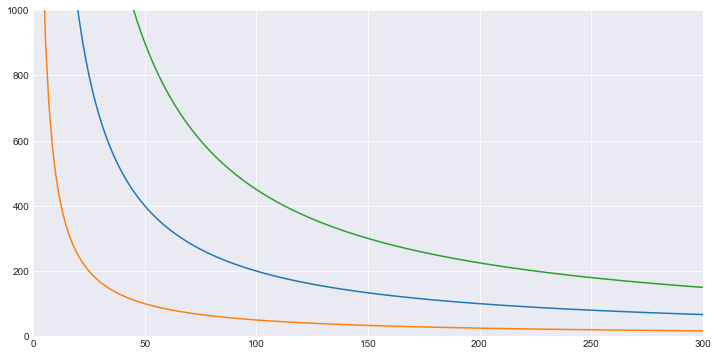

In [95]:
defaults = dict(p=2)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(xr, [c.yfromx_f(x) for x in xr])

plt.ylim((0,1000))
plt.xlim((0,300))
plt.grid()

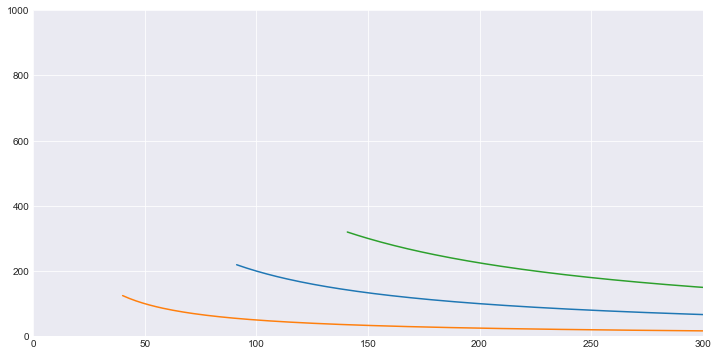

In [96]:
defaults = dict(p=2, x_act=10)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(xr, [c.yfromx_f(x) for x in xr])

plt.ylim((0,1000))
plt.xlim((0,300))
plt.grid()

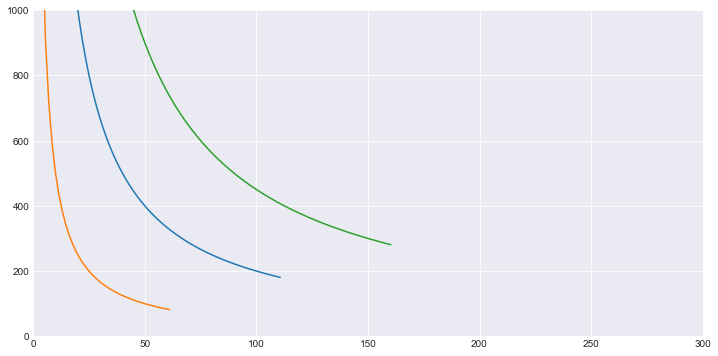

In [97]:
defaults = dict(p=2, y_act=20)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(xr, [c.yfromx_f(x) for x in xr])

plt.ylim((0,1000))
plt.xlim((0,300))
plt.grid()

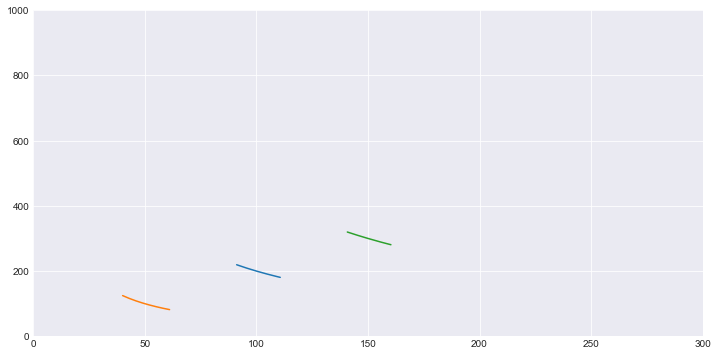

In [98]:
defaults = dict(p=2, x_act=10, y_act=20)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(xr, [c.yfromx_f(x) for x in xr])

plt.ylim((0,1000))
plt.xlim((0,300))
plt.grid()

### Charts (dx, dy)

In [99]:
e=1e-5
dxr = np.linspace(-50+e,50-e,100)

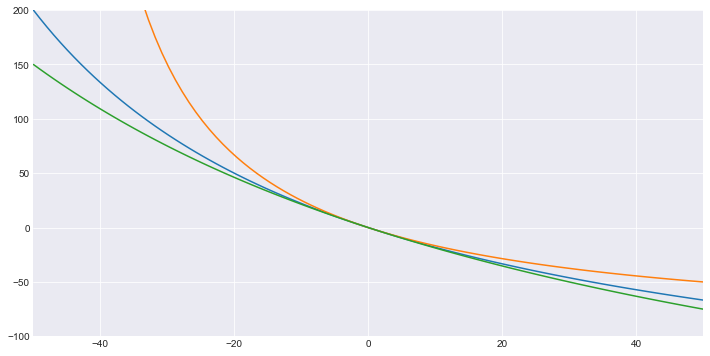

In [100]:
defaults = dict(p=2)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(dxr, [c.dyfromdx_f(dx) for dx in dxr])

plt.ylim((-100,200))
plt.xlim((-50,50))
plt.grid()

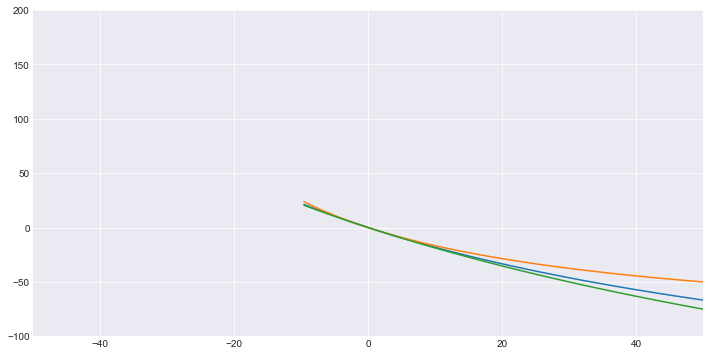

In [101]:
defaults = dict(p=2, x_act=10)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(dxr, [c.dyfromdx_f(dx) for dx in dxr])

plt.ylim((-100,200))
plt.xlim((-50,50))
plt.grid()

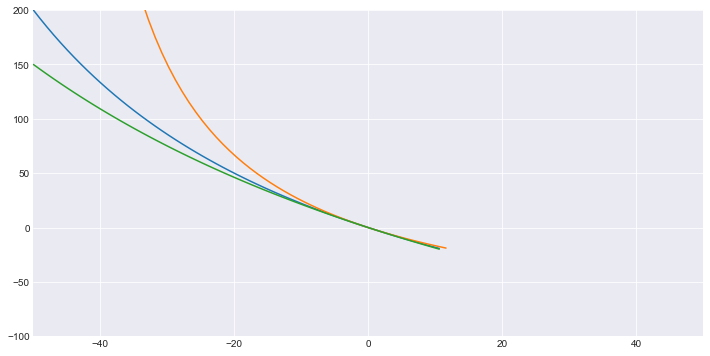

In [102]:
defaults = dict(p=2, y_act=20)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(dxr, [c.dyfromdx_f(dx) for dx in dxr])

plt.ylim((-100,200))
plt.xlim((-50,50))
plt.grid()

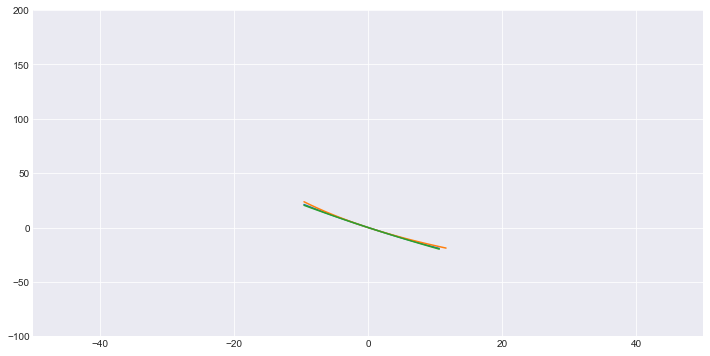

In [103]:
defaults = dict(p=2, x_act=10, y_act=20)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(dxr, [c.dyfromdx_f(dx) for dx in dxr])

plt.ylim((-100,200))
plt.xlim((-50,50))
plt.grid()

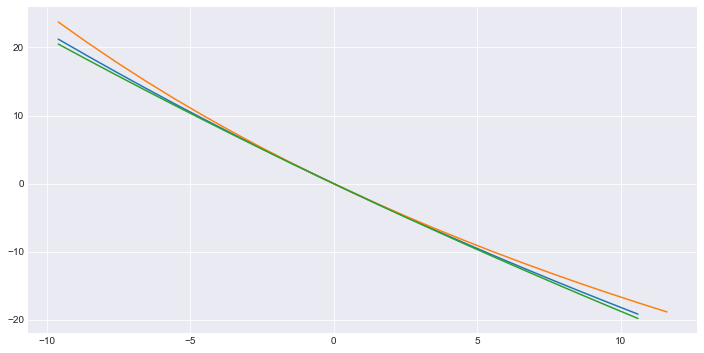

In [104]:
defaults = dict(p=2, x_act=10, y_act=20)
curves = [
    CPC.from_px(x=100, **defaults),
    CPC.from_px(x=50, **defaults),
    CPC.from_px(x=150, **defaults),
]
for c in curves:
    plt.plot(dxr, [c.dyfromdx_f(dx) for dx in dxr])

# plt.ylim((-100,200))
# plt.xlim((-50,50))
plt.grid()